In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

### 导入数据

In [2]:
f= open("机器学习考核数据集.csv")
df= pd.read_csv(f)
print (df.shape)
df.head()

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


# <font color=blue> 步骤一：数据概览 </font> 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


### 查看各列值的分布

In [5]:
for column in df.columns:
    print("列名：%s"%df[column].name)
    print(df[column].value_counts())
    print("——"*15)

列名：age
31    1947
32    1846
33    1833
36    1780
35    1759
34    1745
30    1714
37    1475
29    1453
39    1432
38    1407
41    1278
40    1161
42    1142
45    1103
43    1055
46    1030
44    1011
28    1001
48     979
47     928
50     875
27     851
49     839
52     779
51     754
53     733
56     704
26     698
54     684
      ... 
65      44
19      42
76      34
69      34
72      34
73      34
68      33
74      32
80      31
18      28
78      27
67      26
75      24
88      22
77      20
81      20
82      17
83      17
85      15
79      14
86       8
84       7
17       5
92       4
98       2
89       2
91       2
87       1
94       1
95       1
Name: age, Length: 78, dtype: int64
——————————————————————————————
列名：job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student           

# <font color=blue> 步骤二：缺失值处理 </font>

### 虽然在df.info()中看到数据都是non-null值，但在df[column].value_counts()中看到一些列有unknown值，以及“pdays”列有很多“999”的值，均表示缺失值，需要处理。

### 查看数据中“unknown”值个数

In [6]:
for column in df.columns:
    count=0
    for i in df[column]:
        if i=="unknown":
            count=count+1
    if count>0:
        print("列：%s，其unknown值有%d个"%(df[column].name,count))

列：job，其unknown值有330个
列：marital，其unknown值有80个
列：education，其unknown值有1731个
列：default，其unknown值有8597个
列：housing，其unknown值有990个
列：loan，其unknown值有990个


### 看到有六列：job、marital、education、default（是否有违约）、housing（是否有房贷）、loan（是否有个人贷款）有unknown值，需处理

“default”列有8597个缺失值，显然，将含缺失值的行删除是不现实的，需想办法填充。

查看这些含“unknown”值的列的分布

In [7]:
l1=['job','marital','education','default','housing','loan']
for column in l1:
    print("列名：%s"%df[column].name)
    print(df[column].value_counts())
    print("——"*15)

列名：job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
——————————————————————————————
列名：marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
——————————————————————————————
列名：education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
——————————————————————————————
列名：default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64
——————————————————————————————
列名：housing
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64
———

### 为方便处理缺失值，将“unknown”全部替换为np.nan

In [8]:
df=df.replace("unknown",np.nan)

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,NaN,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,NaN,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


### ffill方法：用后一个非缺失值去填充该缺失值

In [10]:
df=df.fillna(method='bfill')
l1=['job','marital','education','default','housing','loan','pdays']
for column in l1:
    print("列名：%s"%df[column].name)
    print(df[column].value_counts())
    print("——"*15)

列名：job
admin.           10512
blue-collar       9310
technician        6814
services          4002
management        2942
retired           1732
entrepreneur      1467
self-employed     1432
housemaid         1070
unemployed        1021
student            886
Name: job, dtype: int64
——————————————————————————————
列名：marital
married     24982
single      11586
divorced     4620
Name: marital, dtype: int64
——————————————————————————————
列名：education
university.degree      12737
high.school             9921
basic.9y                6312
professional.course     5468
basic.4y                4347
basic.6y                2383
illiterate                20
Name: education, dtype: int64
——————————————————————————————
列名：default
no     41185
yes        3
Name: default, dtype: int64
——————————————————————————————
列名：housing
yes    22092
no     19096
Name: housing, dtype: int64
——————————————————————————————
列名：loan
no     34809
yes     6379
Name: loan, dtype: int64
——————————————————————————————
列名

### 看到：此时已经没有“unknown”/“nan”值了。

# <font color=blue> 步骤三：离散特征编码</font>

In [11]:
dic1={'yes':1,"no":0}
df["weiyue"]=df['default'].map(dic1)
df["housing_map"]=df['housing'].map(dic1)
df["loan_map"]=df['loan'].map(dic1)
dic2={'cellular':1,"telephone":0}
df["contact_map"]=df['contact'].map(dic2)
dic3={'success':2,"failure":0,"nonexistent":1}
df["poutcome_map"]=df['poutcome'].map(dic3)

In [12]:
df["default"].value_counts()

no     41185
yes        3
Name: default, dtype: int64

In [13]:
df["weiyue"].value_counts()

0    41185
1        3
Name: weiyue, dtype: int64

In [14]:
# 去除原“default”、“housing”、“loan”、“contact”、“poutcome”列
df.drop(['default','housing','loan','contact','poutcome'],axis=1, inplace=True)

### 删除无用列

In [15]:
#“month”（最近一次联系的月份）、“day_of_week”（最近一次联系的星期）是不能反映有用信息的，故将其去掉。另外，“age”（离散值）、“duration”已转换为连续值“age_group”、“duration_group”,也将其删除。
df.drop(['month','day_of_week'],axis=1, inplace=True)     
#因为“pdays”这一列含有39673个“999”值，缺失值占比达96.32%，故删除该列
df.drop('pdays',axis=1, inplace=True)         

### get_dummies离散特征编码

In [16]:
df1=pd.get_dummies(df,prefix=['job','marital','education'])
df1.columns

Index(['age', 'duration', 'campaign', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'weiyue', 'housing_map', 'loan_map', 'contact_map', 'poutcome_map',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree'],
      dtype='object')

In [17]:
#np.isnan(df1).any()           #验证df1已没有缺失值

# <font color=blue> 步骤四：连续值分组处理</font>

## 4.1 “age”年龄分组

In [18]:
bins=[0,20,40,60,98]
labels=["20岁以下","20到40岁","40到60岁","60岁以上"]
df1["age_group"]=pd.cut(df1.age,bins,labels=labels)

In [19]:
dic10={'20岁以下':1,"20到40岁":2,"40到60岁":3,"60岁以上":4}
df1["age_map"]=df1['age_group'].map(dic10)

In [20]:
df1.age_group

0        40到60岁
1        40到60岁
2        20到40岁
3        20到40岁
4        40到60岁
5        20到40岁
6        20到40岁
7        20到40岁
8        20到40岁
9        20到40岁
10       20到40岁
11       40到60岁
12       40到60岁
13       20到40岁
14       20到40岁
15       40到60岁
16       20到40岁
17       20到40岁
18       20到40岁
19       20到40岁
20       40到60岁
21       20到40岁
22       20到40岁
23       20到40岁
24       40到60岁
25       20到40岁
26       40到60岁
27       20到40岁
28       20到40岁
29       20到40岁
          ...  
41158    20到40岁
41159    40到60岁
41160    40到60岁
41161    40到60岁
41162    40到60岁
41163    20到40岁
41164    20到40岁
41165    40到60岁
41166    20到40岁
41167    20到40岁
41168    20到40岁
41169    40到60岁
41170    20到40岁
41171    40到60岁
41172    20到40岁
41173    20到40岁
41174    40到60岁
41175    40到60岁
41176    20到40岁
41177    40到60岁
41178    20到40岁
41179    20到40岁
41180    40到60岁
41181    20到40岁
41182    20到40岁
41183    40到60岁
41184    20到40岁
41185    40到60岁
41186    40到60岁
41187    20到40岁
Name: age_group, Length:

### 交叉分析：观察age_group与y的分布

In [21]:
df1.pivot_table(values=["age"],index=["age_group"],columns=["y"],aggfunc=[np.size])

size      
             age      
y              0     1
age_group             
20岁以下         83    57
20到40岁     20964  2664
40到60岁     15005  1505
60岁以上        496   414

## 4.2 “duration”通话持续时间分组

In [22]:
bins=[min(df1.duration)-1,102,180,320,max(df1.duration)+1]     #这里的102、180、320分别为df.duration的25%、50%、75%分位数
labels=["102分钟以下","102到180分钟","180到320分钟","320分钟及以上"]
df1["duration_group"]=pd.cut(df1.duration,bins,labels=labels)

In [23]:
dic4={'102分钟以下':1,"102到180分钟":2,"180到320分钟":3,"320分钟及以上":4}
df1["duration_map"]=df1['duration_group'].map(dic4)

### 交叉分析：观察duration_group与y的分布

可大致观察到，y=1的类别里，通话分钟数越长，注册定期存款的人数越多。

In [24]:
df1.pivot_table(values=["duration"],index=["duration_group"],columns=["y"],aggfunc=[np.size])

size      
               duration      
y                     0     1
duration_group               
102分钟以下           10226    87
102到180分钟          9915   477
180到320分钟          9163  1081
320分钟及以上           7244  2995

In [25]:
df1.drop('duration_group',axis=1, inplace=True)
df1.drop('duration',axis=1, inplace=True)

## 4.3 “campaign”联系次数分组

In [26]:
bins=[min(df1.campaign)-1,3,6,10,max(df1.campaign)+1]     
labels=["0-2次","3-5次","6-9次","10次以上"]
df1["campaign_group"]=pd.cut(df1.campaign,bins,labels=labels,right=False)

In [27]:
dic5={"0-2次":1,"3-5次":2,"6-9次":3,"10次以上":4}
df1["campaign_map"]=df1['campaign_group'].map(dic5)
df1.drop('campaign_group',axis=1, inplace=True)
df1.drop('campaign',axis=1, inplace=True)

In [28]:
df1.head()

,age,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,weiyue,housing_map,...,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,age_group,age_map,duration_map,campaign_map
0,44,0,1.4,93.444,-36.1,4.963,5228.1,0,0,1,...,0,0,0,0,0,0,40到60岁,3,3,1
1,53,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,...,0,0,0,0,0,1,40到60岁,3,2,1
2,28,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,1,...,0,0,0,0,0,1,20到40岁,2,4,2
3,39,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,...,0,0,1,0,0,0,20到40岁,2,3,1
4,55,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,1,...,0,0,0,0,0,0,40到60岁,3,2,1


# <font color=blue> 步骤五：数据标准化</font>

In [29]:
X=df1[[ 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'weiyue', 'housing_map', 'loan_map', 'contact_map', 'poutcome_map',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'marital_single', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree']]

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.34949428,  0.83906065, -0.2274652 , ..., -0.02204119,
        -0.39125376, -0.66909041],
       [-0.34949428, -0.11578127, -0.649003  , ..., -0.02204119,
        -0.39125376,  1.49456633],
       [ 3.69176641, -1.13427931,  0.82810692, ..., -0.02204119,
        -0.39125376,  1.49456633],
       ..., 
       [-0.34949428,  0.64809227,  0.72272247, ..., -0.02204119,
        -0.39125376,  1.49456633],
       [-0.34949428, -2.21643348, -1.97753812, ..., -0.02204119,
         2.55588596, -0.66909041],
       [-0.34949428,  0.64809227,  0.72272247, ..., -0.02204119,
        -0.39125376, -0.66909041]])

# <font color=blue> 步骤六：逻辑回归预测</font>

模型训练

In [31]:
from sklearn.linear_model import LogisticRegression
lr1=LogisticRegression()
lr1.fit(X,df1["y"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

模型预测（predict_proba方法）

In [32]:
pred=lr1.predict(X)
print(pred)

[0 0 1 ..., 0 0 0]


模型评判之——精度值计算

In [33]:
df1["pred_label"]=pred

In [34]:
match=df1["y"]==df1["pred_label"]
correct=df1[match]
accuracy=len(correct)/len(df1)
print(accuracy)

0.8989754297368165


模型评判之——TPR计算

In [35]:
TP=(df1["y"]==1)&(df1["pred_label"]==1)
TP=len(df1[TP])
print(TP)
FN=(df1["y"]==1)&(df1["pred_label"]==0)
FN=len(df1[FN])
print(FN)
TPR=TP/(TP+FN)
print(TPR)

860
3780
0.1853448275862069


模型评判之——TNR计算

In [36]:
TN=(df1["y"]==0)&(df1["pred_label"]==0)
TN=len(df1[TN])
print(TN)
FP=(df1["y"]==0)&(df1["pred_label"]==1)
FP=len(df1[FP])
print(FP)
TNR=TN/(TN+FP)
print(TNR)

36167
381
0.9895753529604903


ROC指标（metrics.roc_curve）

[2 1 0]


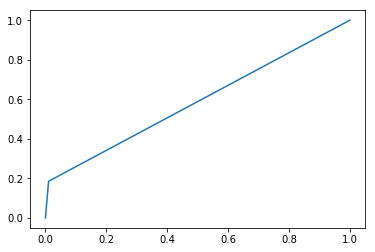

In [37]:
from sklearn import metrics

false_positive_rate,true_positive_rate,thresholds =metrics.roc_curve(df1["y"],df1["pred_label"])
print(thresholds)
plt.plot(false_positive_rate,true_positive_rate)

计算AUC值（即ROC面积）（sklearn.metrics.roc_auc_score）

In [38]:
from sklearn.metrics import roc_auc_score

auc_score=roc_auc_score(df1["y"],df1["pred_label"])
print(auc_score)

0.587460090273


## 交叉验证（sklearn.cross_validation）

In [39]:
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score

lr=LogisticRegression()
kf=KFold(len(df1),5,shuffle=True)
print("每次交叉验证的准确率为：")
accuracies=cross_val_score(lr,X,df["y"],scoring="accuracy",cv=kf)
print(accuracies)
print(type(accuracies))
accuracy=accuracies.mean()
print("平均准确率为：")
print(accuracy)

每次交叉验证的准确率为：


D:\anzhuangruanjian\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


[ 0.89900461  0.90082544  0.89839767  0.89802112  0.89328639]
<class 'numpy.ndarray'>
平均准确率为：
0.89790704801
